In [347]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

### 머신러닝 (act_level)

In [348]:
df = pd.read_csv("./PAMAP_features.csv", index_col=0)

#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

#LabelEncoder를 적용하여 변환
df['sub_id'] = label.fit_transform(df['sub_id'])
df['activity_id'] = label.fit_transform(df['activity_id'])
df['act_level'] = label.fit_transform(df['act_level'])

df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,1,10,0,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,1,3,1,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,6,4,2,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,6,10,0,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,7,2,0,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,5,1,0,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,2,1,0,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,5,3,1,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,1,6,1,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


Text(0.5, 1.0, 'PAMAP')

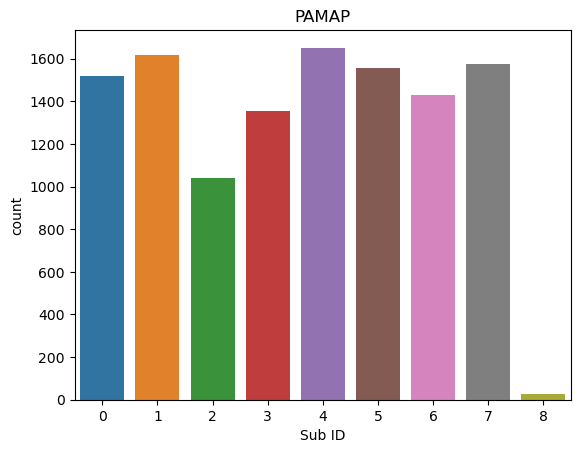

In [349]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="sub_id")
plt.xlabel("Sub ID")
plt.title("PAMAP")

In [350]:
# 레이블 갯수 확인 (숫자)
df['sub_id'].value_counts()

sub_id
4    1651
1    1618
7    1576
5    1556
0    1518
6    1430
3    1353
2    1042
8      29
Name: count, dtype: int64

Text(0.5, 1.0, 'PAMAP')

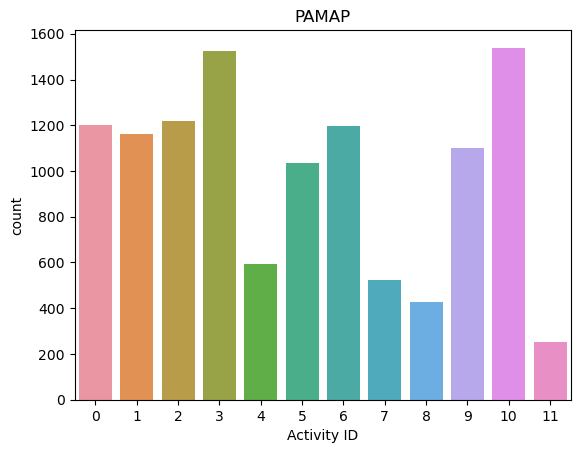

In [351]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="activity_id")
plt.xlabel("Activity ID")
plt.title("PAMAP")

In [352]:
# 레이블 갯수 확인 (숫자) -> 편향의 정도를 확인하기 위해서 확인한다.
df['activity_id'].value_counts()

activity_id
10    1539
3     1525
2     1220
0     1203
6     1196
1     1162
9     1099
5     1035
4      593
7      522
8      428
11     251
Name: count, dtype: int64

Text(0.5, 1.0, 'PAMAP')

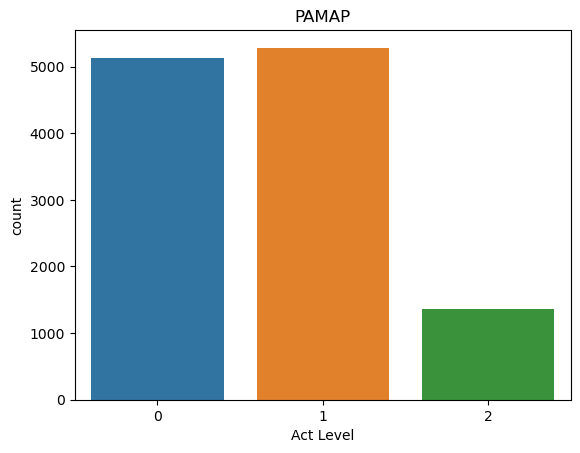

In [353]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="act_level")
plt.xlabel("Act Level")
plt.title("PAMAP")

In [354]:
# 레이블 갯수 확인 (숫자) -> 편향의 정도를 확인하기 위해서 확인한다.
df['act_level'].value_counts()

act_level
1    5283
0    5124
2    1366
Name: count, dtype: int64

In [355]:
# 결측치 확인
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hr_mean             0
hr_mean_normal      0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 67, dtype: int64

In [356]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hr_mean             0
hr_mean_normal      0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 67, dtype: int64

In [357]:
X=df.drop(['sub_id', 'act_level'], axis=1)

X.head()
# head()는 첫 5행만 출력함.

,activity_id,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,10,87.000000,1.175676,0.000000,7.105427e-15,34.3750,0.0,-1.165524,2.383779,3.381285,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,3,124.605469,1.683858,0.927920,1.253946e-02,31.8750,0.0,-12.040995,3.734766,3.069947,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,4,113.493430,1.891557,2.315888,3.859813e-02,32.5000,0.0,-3.723040,10.188184,11.705779,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,10,82.513672,1.375228,0.492657,8.210948e-03,33.8125,0.0,-3.618932,1.935690,0.542981,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,2,73.000000,1.106061,0.000000,7.327472e-15,34.4375,0.0,-9.275877,0.082824,1.006239,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685


In [358]:
y=df['act_level']
y.value_counts()

act_level
1    5283
0    5124
2    1366
Name: count, dtype: int64

In [359]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,activity_id,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
4003,6,124.000000,1.675676,0.000000,2.153833e-14,30.190674,0.013722,-9.546343,3.375490,4.933776,...,-0.032127,-0.308496,-0.318698,-0.280268,0.047917,-0.787143,-0.160538,-0.701586,-0.629107,0.362436
12008,6,115.000000,1.916667,0.000000,1.421085e-14,30.381958,0.019659,-5.025204,4.336074,7.973560,...,-0.439645,-0.039964,-0.328115,-0.418634,-0.081783,-0.058669,-0.206770,-0.459657,-0.306672,0.194089
1382,3,119.979492,1.599727,0.127311,1.697481e-03,33.194580,0.019809,-10.137418,3.467884,4.428044,...,0.041705,-0.128491,-0.601198,-0.492646,-0.188496,-0.632446,-0.151706,-0.553157,-0.778303,0.306613
6967,9,116.658203,2.011348,0.466765,8.047671e-03,33.656128,0.031250,-8.836882,1.708309,2.888983,...,-0.000476,-0.138586,-0.022401,0.065541,-0.021661,-0.395656,-0.643798,0.102230,-0.389063,0.000441
5832,3,119.000000,1.750000,0.000000,0.000000e+00,29.656128,0.031250,-12.250689,2.960968,2.896663,...,-0.255368,-0.272865,-0.897084,0.460136,-0.050740,0.319996,-0.085574,0.193541,0.899430,0.342511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,1,92.000000,1.243243,0.000000,6.661338e-15,33.812500,0.000000,-4.357689,2.952657,7.693815,...,0.137440,-0.174543,0.237796,0.067775,-0.201561,-0.616165,0.007301,0.567074,-0.546483,-0.398801
14291,5,104.605469,1.743424,0.683011,1.138352e-02,33.000000,0.000000,-4.657513,1.604491,2.285957,...,-0.033366,-0.382679,0.008502,-0.425129,0.274348,-0.454366,-0.110536,0.345683,-0.514809,0.063547
4650,1,80.742188,1.187385,0.433352,6.372826e-03,31.625000,0.000000,-0.606078,0.534985,8.980145,...,0.522188,-0.176937,-0.446573,0.108573,0.067445,-0.624934,-0.092516,0.083229,-0.461855,-0.179261
2156,0,86.597656,1.170239,1.109448,1.499254e-02,33.492920,0.019809,-1.760465,7.712154,3.789683,...,0.240315,-0.214268,-0.464665,0.345377,0.205332,-0.414919,-0.600709,0.260374,-0.102413,0.068893


In [360]:
y_train

4003     1
12008    1
1382     1
6967     1
5832     1
        ..
2366     0
14291    1
4650     0
2156     0
13284    0
Name: act_level, Length: 9418, dtype: int32

In [361]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

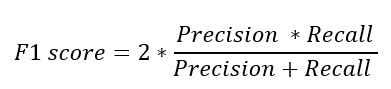

In [362]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print('{:.5f}'.format(accuracy_score(y_test, pred_svm)))
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test,pred_nn))


--- SVM Classifier ---
0.94650
[[ 996    7    0]
 [  13 1047    6]
 [   0  100  186]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1003
           1       1.00      1.00      1.00      1066
           2       1.00      1.00      1.00       286

    accuracy                           1.00      2355
   macro avg       1.00      1.00      1.00      2355
weighted avg       1.00      1.00      1.00      2355



In [363]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_dt)))
print (confusion_matrix(y_test, pred_dt))
print(classification_report(y_test,pred_nn))


--- Decision Tree Classifier ---
0.99321
[[ 998    5    0]
 [   2 1060    4]
 [   0    5  281]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1003
           1       1.00      1.00      1.00      1066
           2       1.00      1.00      1.00       286

    accuracy                           1.00      2355
   macro avg       1.00      1.00      1.00      2355
weighted avg       1.00      1.00      1.00      2355



In [364]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_nn)))
print (confusion_matrix(y_test, pred_nn))
print(classification_report(y_test,pred_nn))


--- Neural Network Classifier ---
0.99788
[[1003    0    0]
 [   4 1061    1]
 [   0    0  286]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1003
           1       1.00      1.00      1.00      1066
           2       1.00      1.00      1.00       286

    accuracy                           1.00      2355
   macro avg       1.00      1.00      1.00      2355
weighted avg       1.00      1.00      1.00      2355



### 딥러닝 (sub_id)

In [365]:
df = pd.read_csv("./PAMAP_features.csv", index_col=0)
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 'class' 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['sub_id'] = label.fit_transform(df['sub_id'])
df['activity_id'] = label.fit_transform(df['activity_id'])
df['act_level'] = label.fit_transform(df['act_level'])

df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,1,10,0,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,1,3,1,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,6,4,2,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,6,10,0,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,7,2,0,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,5,1,0,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,2,1,0,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,5,3,1,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,1,6,1,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [366]:
X=df.drop(['sub_id', 'activity_id'], axis=1)

X.head()
# head()는 첫 5행만 출력함.

,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,0,87.000000,1.175676,0.000000,7.105427e-15,34.3750,0.0,-1.165524,2.383779,3.381285,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,1,124.605469,1.683858,0.927920,1.253946e-02,31.8750,0.0,-12.040995,3.734766,3.069947,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,2,113.493430,1.891557,2.315888,3.859813e-02,32.5000,0.0,-3.723040,10.188184,11.705779,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,0,82.513672,1.375228,0.492657,8.210948e-03,33.8125,0.0,-3.618932,1.935690,0.542981,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,0,73.000000,1.106061,0.000000,7.327472e-15,34.4375,0.0,-9.275877,0.082824,1.006239,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685


In [367]:
y=df['activity_id']

y.value_counts()

activity_id
10    1539
3     1525
2     1220
0     1203
6     1196
1     1162
9     1099
5     1035
4      593
7      522
8      428
11     251
Name: count, dtype: int64

### One-hot Encoding

In [368]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [369]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3733,1,126.350675,1.707442,0.481022,6.500298e-03,31.06958,0.019809,-11.155840,2.169085,3.275928,...,0.034322,-0.602520,0.043783,-0.640547,-0.117516,-0.650532,-0.089236,-0.619168,-0.709268,0.270112
14076,1,116.000000,1.933333,0.000000,2.420286e-14,33.06958,0.019809,-1.168302,3.338601,9.672736,...,-0.116193,0.041214,-0.049492,-0.285888,0.033368,0.470741,-0.176193,-0.757515,-0.626930,0.429096
15690,2,122.943892,1.862786,1.517114,2.298658e-02,34.31250,0.000000,-10.513332,5.402042,-1.033538,...,-0.332085,-0.050074,0.810940,-0.217737,0.125797,-0.375305,-0.104628,0.013147,0.738929,0.029031
12870,0,75.785156,1.263086,0.406368,6.772796e-03,32.72290,0.030973,-9.079240,0.161293,2.633184,...,0.270700,-0.254684,-0.146603,-0.082435,0.178775,-0.258471,-0.128551,0.127899,-0.047703,-0.060931
13034,0,75.654297,1.260905,0.471849,7.864148e-03,33.25000,0.000000,-9.204090,0.131730,2.883122,...,0.229206,-0.305763,-0.159656,-0.338020,0.094215,-0.144609,-0.311287,-0.094936,0.049618,-0.319101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,0,92.000000,1.243243,0.000000,6.661338e-15,33.81250,0.000000,-4.357689,2.952657,7.693815,...,0.137440,-0.174543,0.237796,0.067775,-0.201561,-0.616165,0.007301,0.567074,-0.546483,-0.398801
14291,1,104.605469,1.743424,0.683011,1.138352e-02,33.00000,0.000000,-4.657513,1.604491,2.285957,...,-0.033366,-0.382679,0.008502,-0.425129,0.274348,-0.454366,-0.110536,0.345683,-0.514809,0.063547
4650,0,80.742188,1.187385,0.433352,6.372826e-03,31.62500,0.000000,-0.606078,0.534985,8.980145,...,0.522188,-0.176937,-0.446573,0.108573,0.067445,-0.624934,-0.092516,0.083229,-0.461855,-0.179261
2156,0,86.597656,1.170239,1.109448,1.499254e-02,33.49292,0.019809,-1.760465,7.712154,3.789683,...,0.240315,-0.214268,-0.464665,0.345377,0.205332,-0.414919,-0.600709,0.260374,-0.102413,0.068893


In [370]:
X_test.shape

(2944, 65)

In [371]:
X_train.shape[1]

65

In [372]:
y_train

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [373]:
y_train.shape

(8829, 12)

In [374]:
#Defining the model 
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Nadam

model = Sequential()

model.add(Dense(30,input_shape=(X_train.shape[1],),activation='relu'))
#input_shape: 입력 데이터의 모양을 지정한다. 첫 번째 레이어에서만 사용된다.
model.add(Dense(20,activation='relu'))
model.add(Dense(12,activation='softmax'))

#출력 유닛 수는 클래스 수(레이블 수)와 동일하게 설정한다!!!!!!

model.compile(Adam(learning_rate=0.02),'categorical_crossentropy', metrics=['accuracy'])
# 이진 분류일 때, model.compile(Adam(lr=0.04),'bce',metrics=['accuracy']) 를 써야한다.

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 30)                1980      
                                                                 
 dense_82 (Dense)            (None, 20)                620       
                                                                 
 dense_83 (Dense)            (None, 12)                252       
                                                                 
Total params: 2852 (11.14 KB)
Trainable params: 2852 (11.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [375]:
model_history=model.fit(x=X_train, y=y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/20
276/276 [==============================] - 5s 9ms/step - loss: 1.1570 - accuracy: 0.5918 - val_loss: 0.5824 - val_accuracy: 0.7707
Epoch 2/20
276/276 [==============================] - 2s 7ms/step - loss: 0.4822 - accuracy: 0.8163 - val_loss: 0.4920 - val_accuracy: 0.8166
Epoch 3/20
276/276 [==============================] - 2s 9ms/step - loss: 0.3917 - accuracy: 0.8542 - val_loss: 0.4408 - val_accuracy: 0.8213
Epoch 4/20
276/276 [==============================] - 2s 9ms/step - loss: 0.3852 - accuracy: 0.8614 - val_loss: 0.2514 - val_accuracy: 0.9185
Epoch 5/20
276/276 [==============================] - 3s 9ms/step - loss: 0.2978 - accuracy: 0.8917 - val_loss: 0.3569 - val_accuracy: 0.8719
Epoch 6/20
276/276 [==============================] - 2s 7ms/step - loss: 0.3128 - accuracy: 0.8891 - val_loss: 0.2605 - val_accuracy: 0.9032
Epoch 7/20
276/276 [==============================] - 3s 10ms/step - loss: 0.2573 - accuracy: 0.9049 - val_loss: 0.2707 - val_accuracy: 0.8967
Epoch

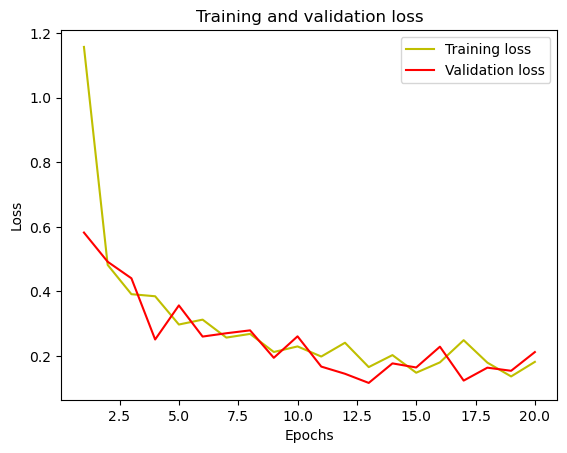

In [376]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

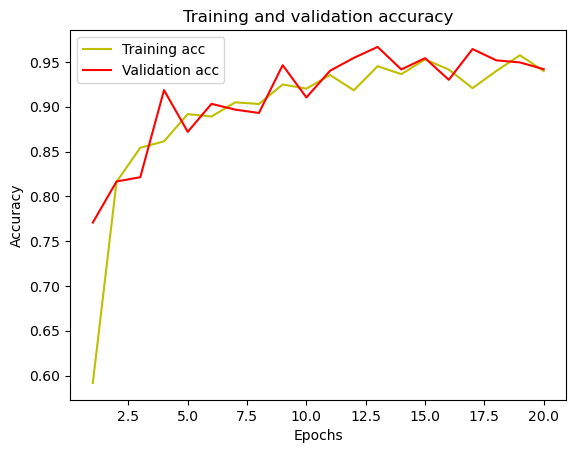

In [377]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [378]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       0.92      0.90      0.91       302
           2       0.90      0.92      0.91       295
           3       0.98      0.99      0.99       367
           4       1.00      0.88      0.93       146
           5       0.95      1.00      0.97       274
           6       0.89      0.99      0.94       302
           7       0.93      0.99      0.96       144
           8       1.00      0.63      0.77       111
           9       0.94      0.95      0.94       288
          10       0.96      0.91      0.93       349
          11       0.77      0.97      0.86        62

    accuracy                           0.94      2944
   macro avg       0.94      0.93      0.93      2944
weighted avg       0.94      0.94      0.94      2944

[[304   0   0   0   0   0   0   0   0   0   0   0]
 [  1 271  16   2   0   0   0   0   0   1  11   0]
 [  0  17 271   0   0   0   0  